In [377]:
import os 
import zipfile

zip_ref = zipfile.ZipFile(file='facial-keypoints-detection.zip',mode='r')
zip_ref.extractall()


In [415]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [416]:
train= pd.read_csv('training.csv')

In [417]:
os.listdir()

['.ipynb_checkpoints',
 'facial-keypoints-detection.zip',
 'facial_keypoint_detection.ipynb',
 'IdLookupTable.csv',
 'SampleSubmission.csv',
 'submission.csv',
 'test.csv',
 'test.zip',
 'training.csv',
 'training.zip']

In [418]:
train.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [419]:
#train['Image'][0]
print('size of traning data {}'.format(len(train)))
print('Missing vlaue col ')
print(train.isnull().any().value_counts())
train.isnull().sum().sort_values(ascending=False)

size of traning data 7049
Missing vlaue col 
True     28
False     3
dtype: int64


left_eyebrow_outer_end_y     4824
left_eyebrow_outer_end_x     4824
right_eyebrow_outer_end_y    4813
right_eyebrow_outer_end_x    4813
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
mouth_left_corner_y          4780
mouth_left_corner_x          4780
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
right_eyebrow_inner_end_y    4779
right_eyebrow_inner_end_x    4779
mouth_right_corner_x         4779
mouth_right_corner_y         4779
left_eye_inner_corner_y      4778
left_eye_inner_corner_x      4778
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_y      33
mouth_center_bottom_lip_x      33
right_eye_center_y             13
right_eye_center_x             13
left_eye_center_y              10
left_eye_center_x              10
nose_tip_x                      0
nose_tip_y    

# fill missing value

In [420]:
#ffill which fills the place with value in the Forward index or Previous/Back respectively.

train.fillna(method='ffill',inplace=True)
#check missig col
train.isnull().any().value_counts()

False    31
dtype: int64

In [421]:
len(train)

7049

In [422]:
# convert image col to int  also check NaN
image_list=[]

for i in train['Image']:
    i=i.split(' ')
    image_list.append(i)
len(image_list)



7049

In [423]:
len(image_list[0])
#96X96

9216

In [424]:
#covert to arry
image_list = np.array(object=image_list,dtype=float)

In [425]:
images=image_list.reshape(-1,96,96,1)

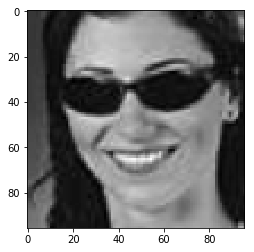

In [426]:
plt.imshow(image_list.reshape(-1,96,96)[3010],cmap='gray')

In [427]:
IMAGE_HEIGHT=96
IMAGE_WIDTH=96
#Ytrain.iloc[3010][Ytrain.iloc[3010].index[1]]
#np.dtype(Ytrain.iloc[3010]['left_eye_center_y'])
def img_show(image_list,train):
    fig,axes = plt.subplots(nrows=5,ncols=2,dpi=300,figsize=(12,12))

    for row in range(5):
        for col in range(1):
            #random number  generator for diff image
            j  =np.random.randint(0,len(train))
            X = image_list.reshape(-1,96,96)[j]
            Y = train

            Y=Y.iloc[j]# location of Y
            img = np.copy(X) #copy image
            for i in range(0,30,2):
            #print(Y[Y.index[i+1]])
                   if 0 < Y[Y.index[i]] < IMAGE_WIDTH and  0 < Y[Y.index[i+1]] < IMAGE_HEIGHT:
                    img[int(Y[Y.index[i+1]]),int(Y[Y.index[i]])] = 255
            axes[row,col].imshow(img,cmap='gray')
            axes[row,col+1].imshow(X,cmap='gray')
            #remove axies
            axes[row,col].axis('off')
            axes[row,col+1].axis('off')

    plt.tight_layout()


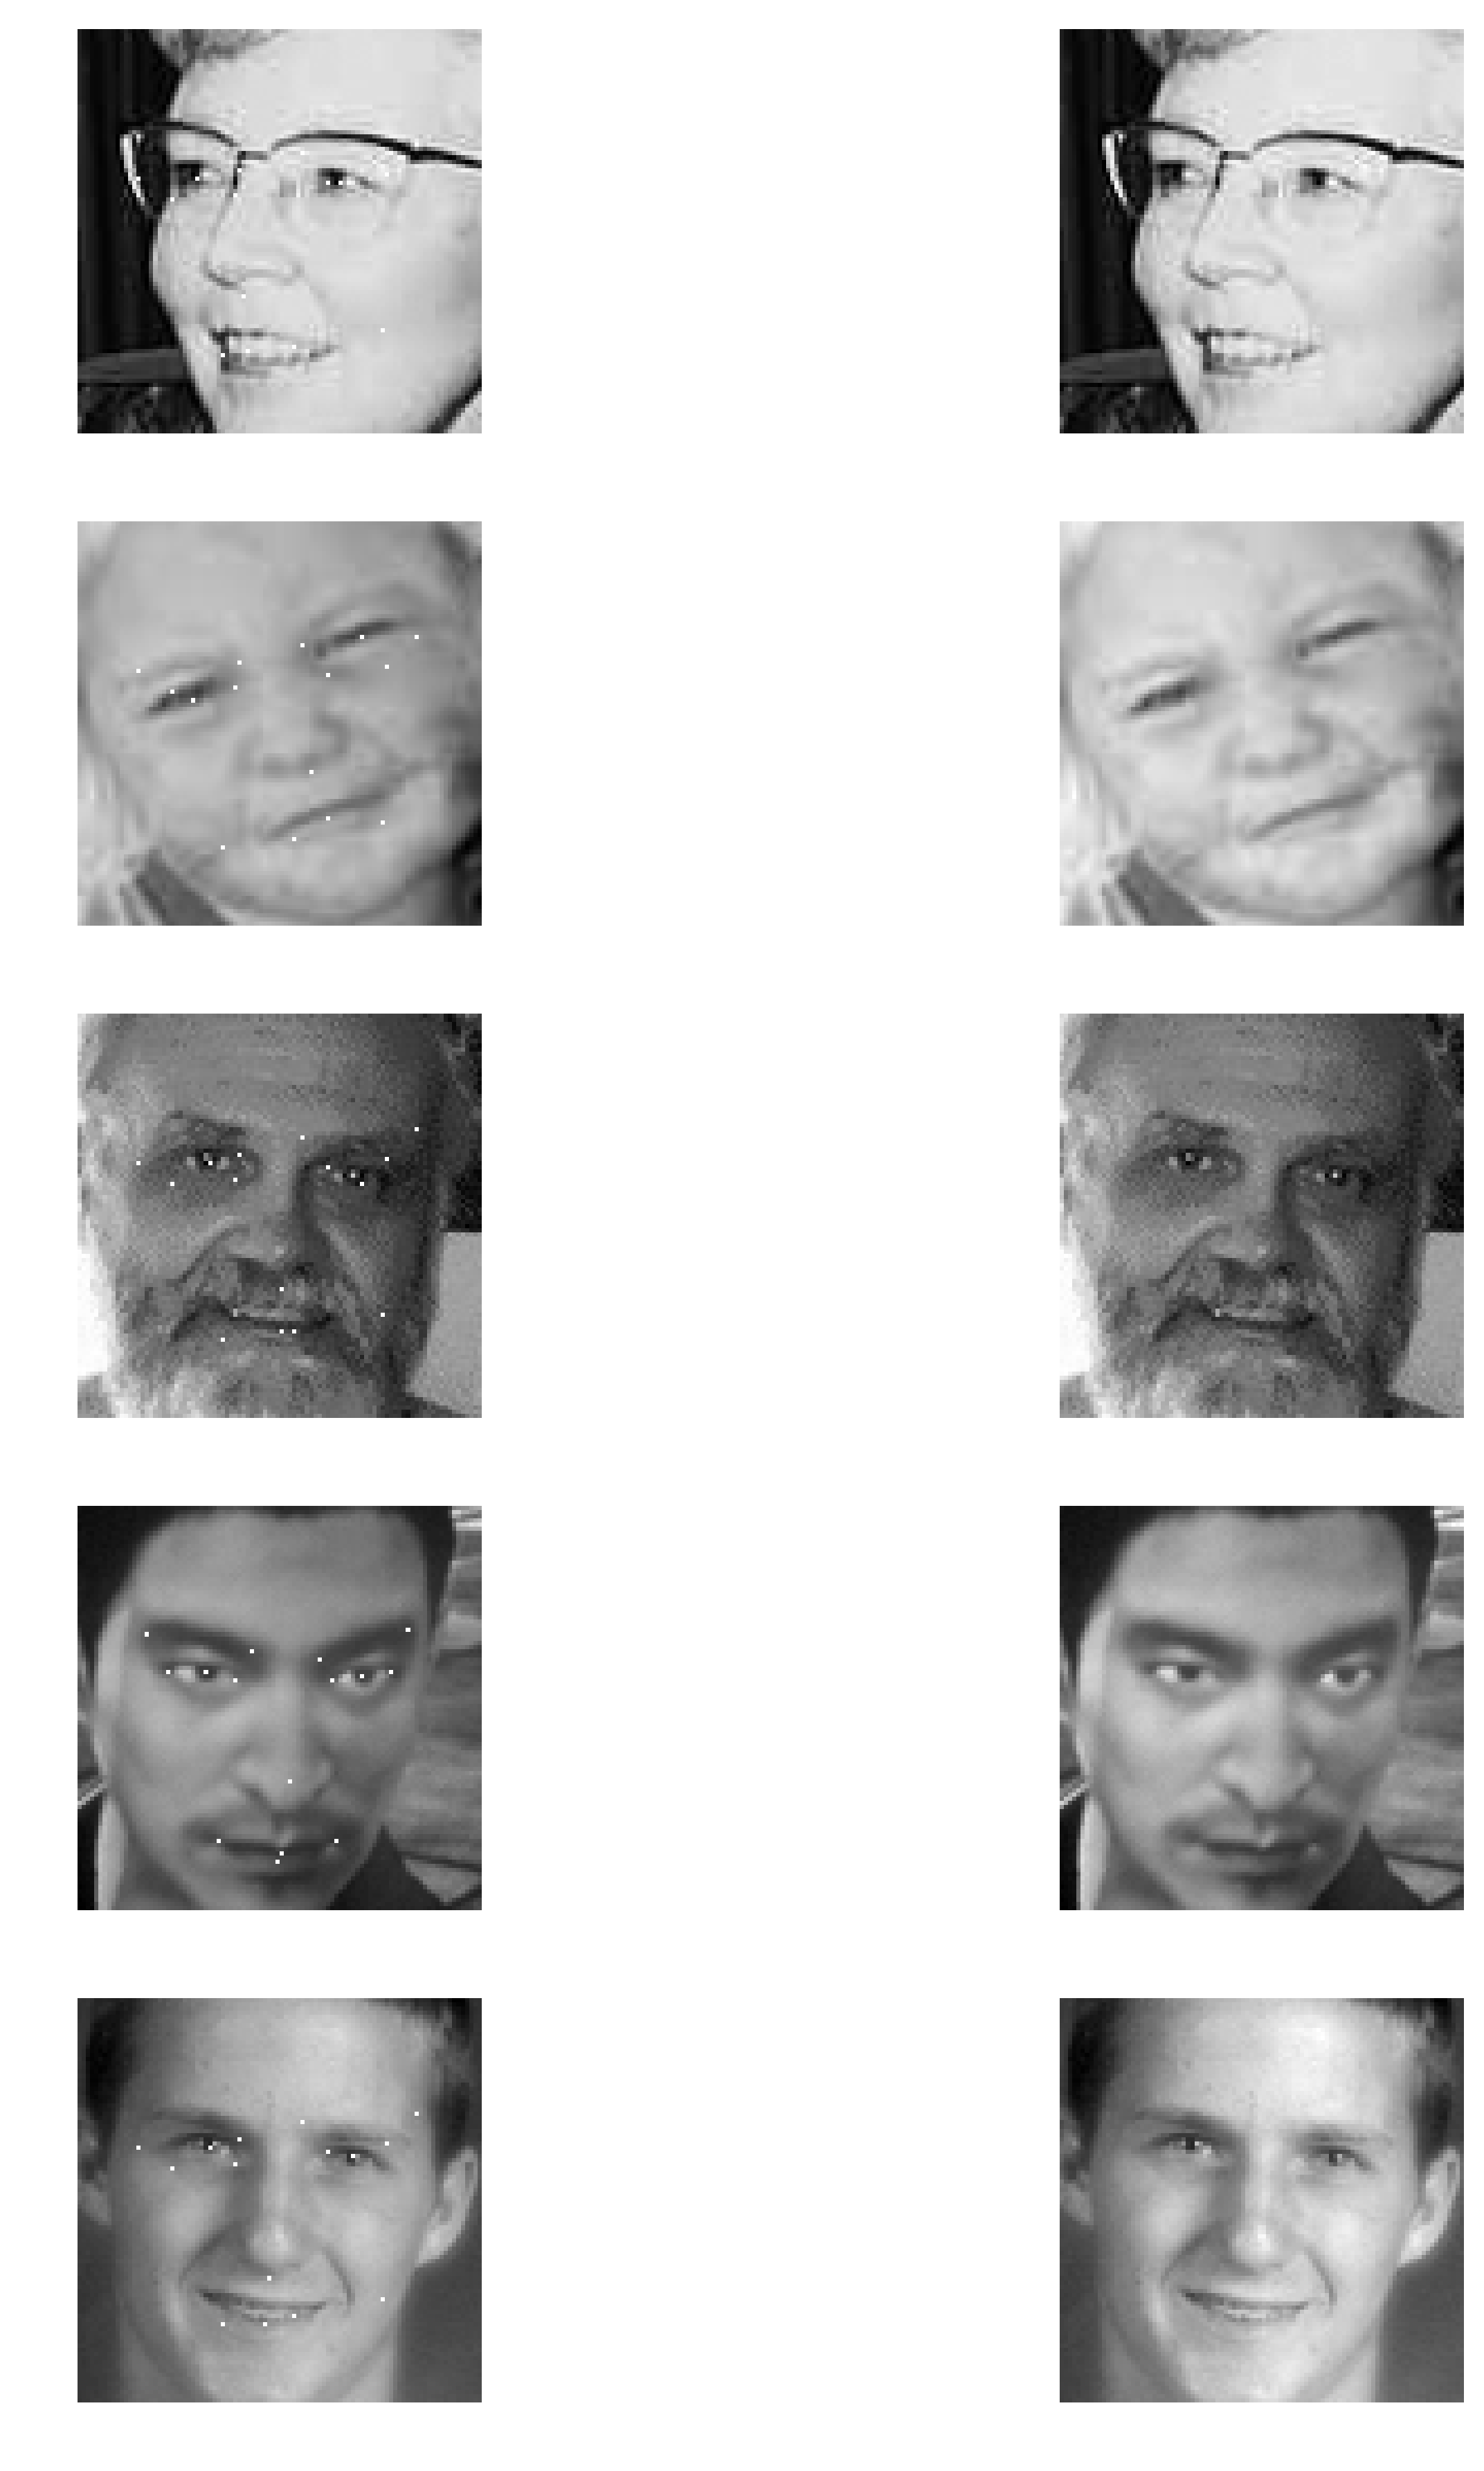

In [428]:
img_show(image_list,train.drop(labels='Image',axis=1))

In [392]:
print(type(images[0][0]))
# covert to float for  display
print(type(train['Image'][0]))

<class 'numpy.ndarray'>
<class 'str'>


In [393]:
y_train=train.drop(labels='Image',axis=1)
y_train.shape

(7049, 30)

In [394]:
X_train=images
X_train.shape
#lenght of tensor has 4 index

(7049, 96, 96, 1)

In [395]:
X_train=X_train/255
X_train[1]

array([[[0.85882353],
        [0.84313725],
        [0.8       ],
        ...,
        [0.36078431],
        [0.34509804],
        [0.32941176]],

       [[0.87058824],
        [0.85882353],
        [0.8627451 ],
        ...,
        [0.36078431],
        [0.34509804],
        [0.3372549 ]],

       [[0.90588235],
        [0.87843137],
        [0.83137255],
        ...,
        [0.30196078],
        [0.31372549],
        [0.32941176]],

       ...,

       [[0.00392157],
        [0.00392157],
        [0.00392157],
        ...,
        [0.00392157],
        [0.00392157],
        [0.00392157]],

       [[0.00392157],
        [0.00392157],
        [0.00392157],
        ...,
        [0.00392157],
        [0.00392157],
        [0.00392157]],

       [[0.00392157],
        [0.00392157],
        [0.00392157],
        ...,
        [0.00392157],
        [0.00392157],
        [0.00392157]]])

In [396]:
import tensorflow as tf

In [397]:
import tensorflow as tf
model= tf.keras.models.Sequential(
    
    layers=[
        
         #convolution 1st time
        tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(96,96,1)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Dropout(0.2),
         #convolution 2nd time
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(96,96,1)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Dropout(0.2),
         #convolution 2nd time
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(96,96,1)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Dropout(0.4),
        #input layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
         tf.keras.layers.Dense(units=128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        # number of keypoint
        tf.keras.layers.Dense(units=30)
    ]
)


In [398]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 94, 94, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               15860224  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

In [399]:
model.compile(optimizer='adam',
             loss='mse',
              metrics=['acc'])

In [1]:
#fit generator is used when you want to avoid duplicate data when using multiprocessing
hist=model.fit(x=X_train,y=y_train,batch_size=128,epochs=500,verbose=2,validation_split=0.2)
hist

NameError: name 'model' is not defined

In [2]:
loss=hist.history['loss']
val_loss=hist.history['val_loss']
y=np.arange(1,501)
plt.plot(y,loss,'b',label='train')
plt.plot(y,val_loss,'r',label='val')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend()

plt.legend()

NameError: name 'hist' is not defined

In [402]:
model.evaluate(X_train,y_train,batch_size=128,verbose=2)

 - 3s - loss: 30.0386 - acc: 0.3564


[30.038578659038134, 0.3563626]

In [429]:
zip_ref = zipfile.ZipFile(file='test.zip',mode='r')
zip_ref.extractall()
test= pd.read_csv('test.csv')



In [430]:
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [431]:
# convert image col to int  also check NaN
image_list=[]

for i in test['Image']:
    i=i.split(' ')
    image_list.append(i)
len(image_list)

1783

In [432]:
image_list=np.array(image_list,dtype=float)
images=image_list.reshape(-1,96,96,1)
X_test =images/255.0

In [433]:
predicted_value =model.predict(X_test)

In [440]:
pv =pd.DataFrame(data=predicted_value)

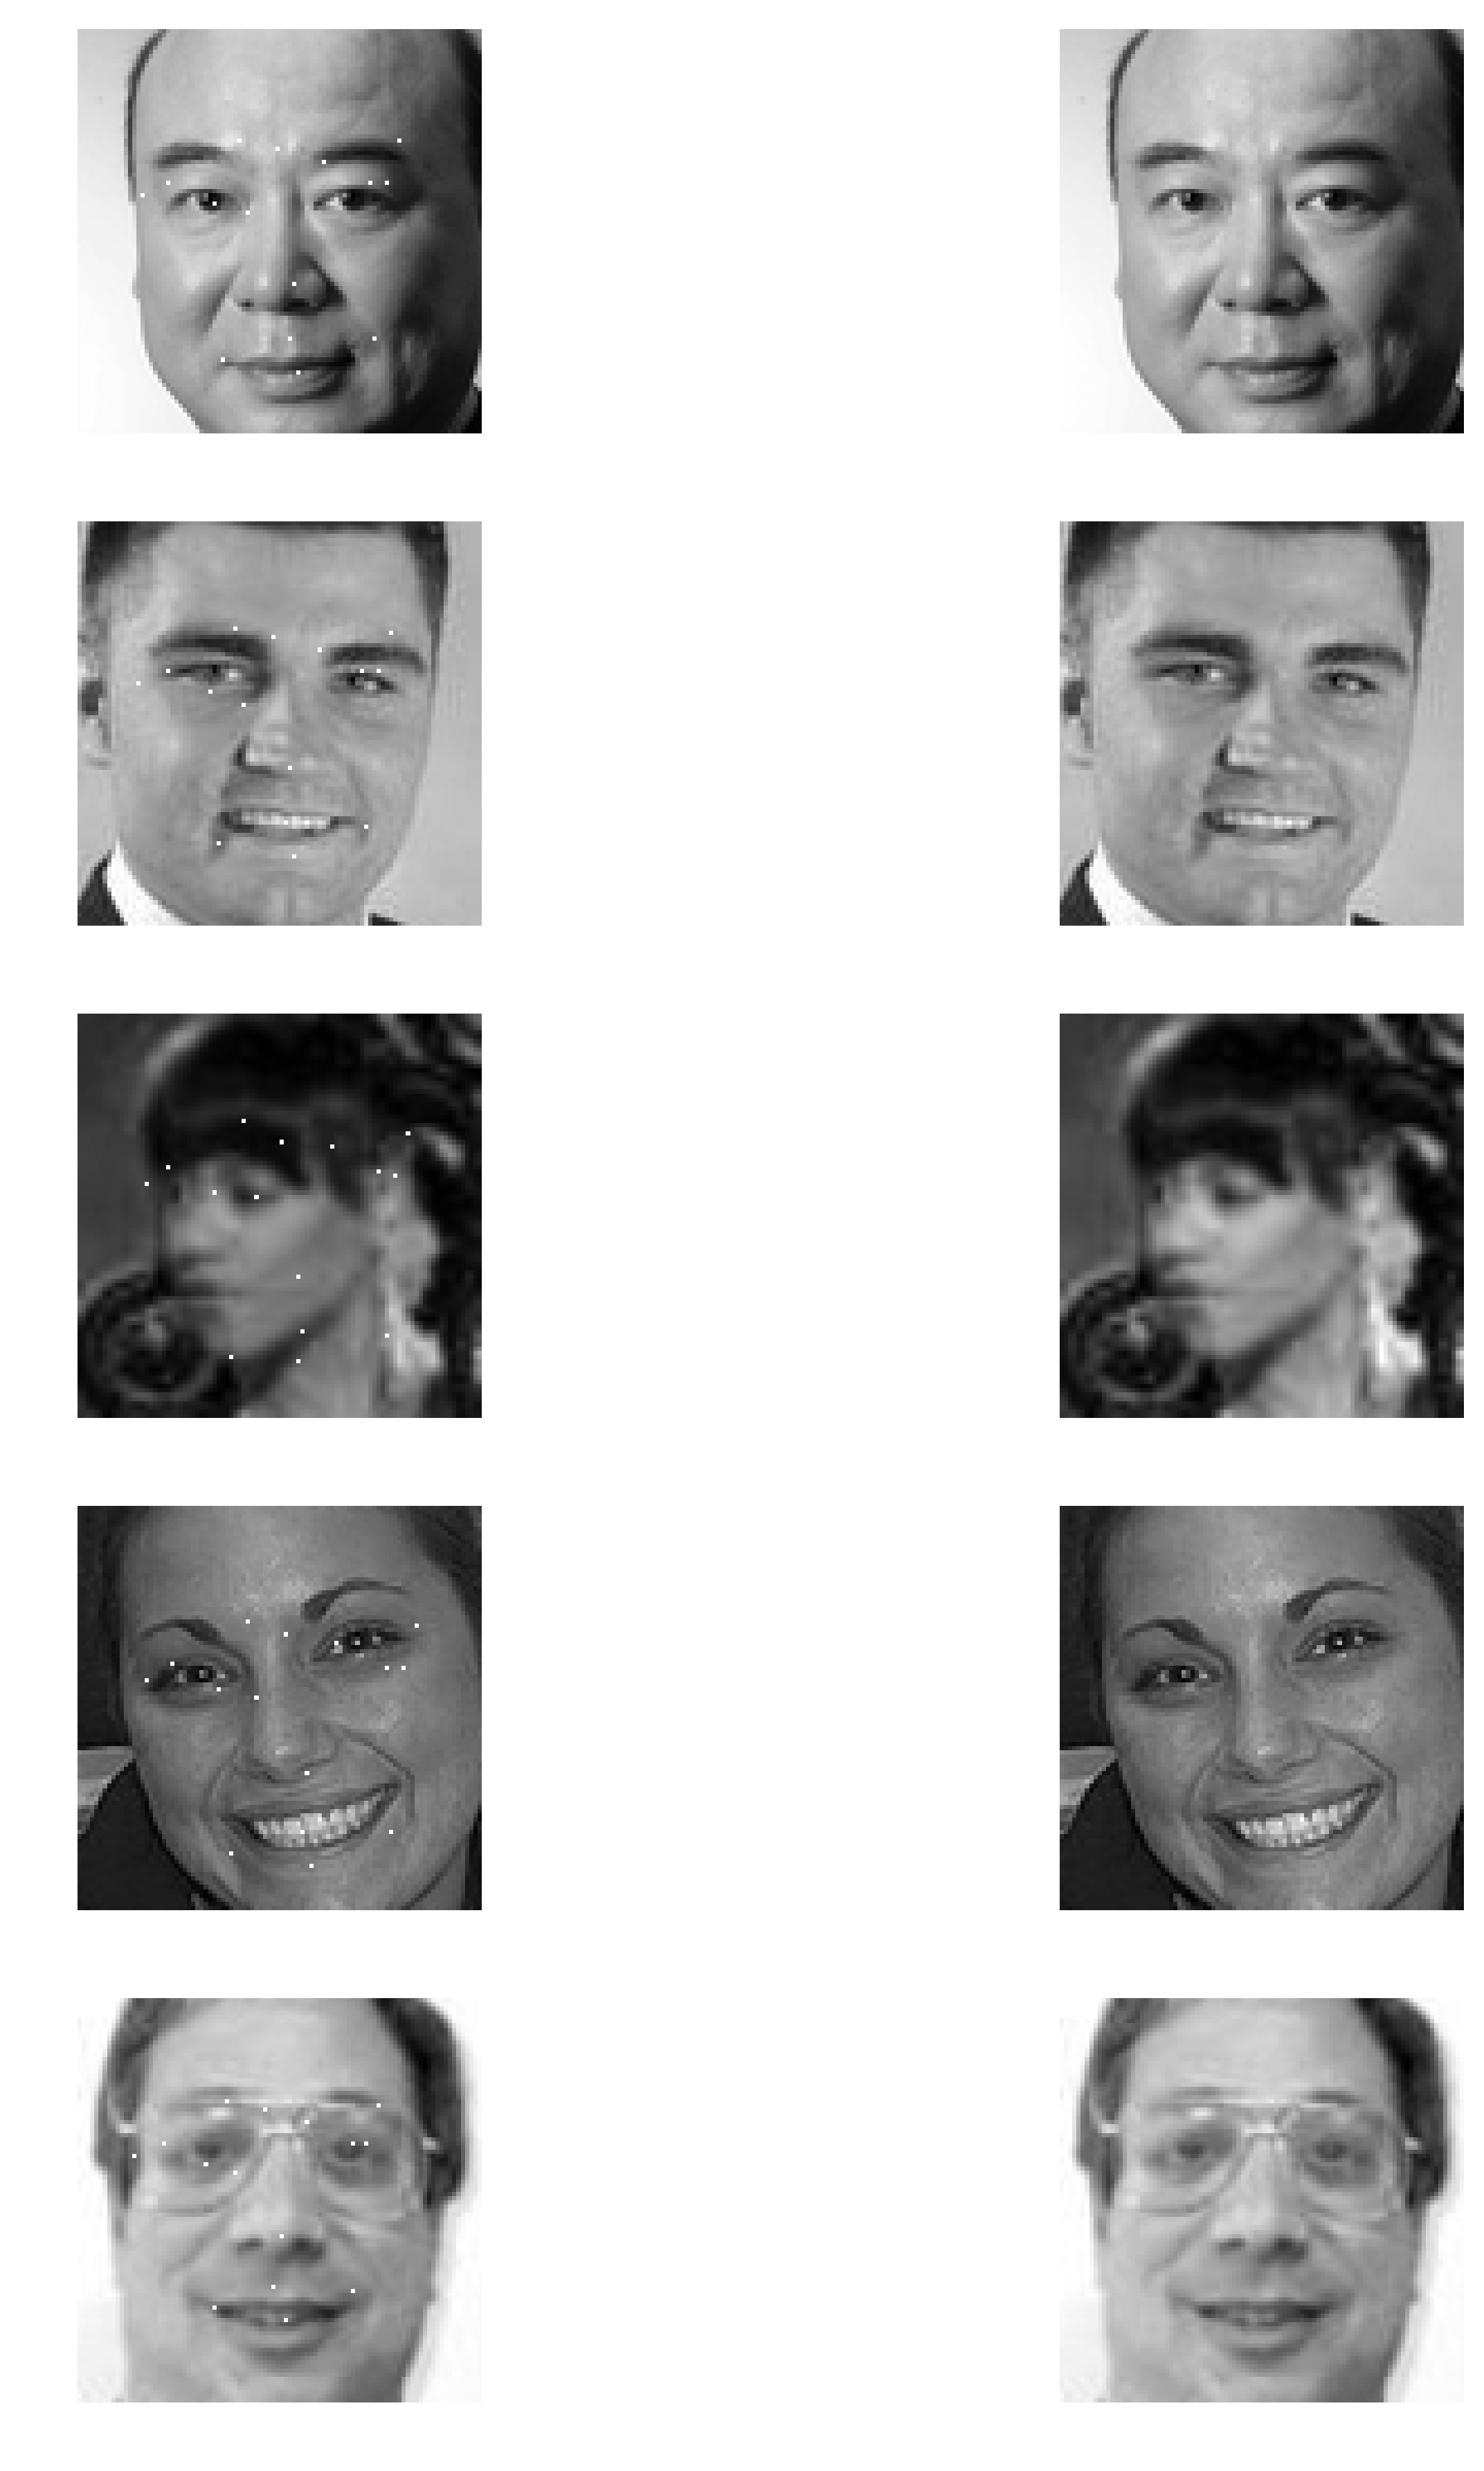

In [442]:
img_show(image_list,pv)

In [365]:
pred = model.predict(X_test)
lookid_data = pd.read_csv('IdLookupTable.csv')
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)
rowid = lookid_data['RowId']
rowid=list(rowid)
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])
rowid = pd.Series(rowid,name = 'RowId')

loc = pd.Series(preded,name = 'Location')

submission = pd.concat([rowid,loc],axis = 1)
submission.to_csv('submission.csv',index = False)

In [366]:
df =pd.read_csv('submission.csv')

In [367]:
df

,RowId,Location
0,1,65.707314
1,2,34.548302
2,3,28.458567
3,4,35.545620
4,5,58.374245
5,6,37.352337
6,7,72.060600
7,8,37.550003
8,9,34.748203
9,10,35.838715
